Load necessary libraries and set data path

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 10.0)

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from utils import label_dist

DATA_PATH = './data/'

Read from file and explore

In [2]:
df = pd.read_csv(DATA_PATH+'creditcard.csv',dtype=np.float32)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.619995,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660004,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798279,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.989998,0.0


In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.867188,1.339397e-08,0.000000,-4.800400e-08,6.643411e-09,2.657364e-08,-1.500125e-09,-1.071518e-09,-1.071518e-10,-3.214554e-10,...,-1.928732e-09,3.643161e-09,3.214554e-10,1.259033e-09,2.143036e-09,1.034684e-09,1.138488e-10,-1.272427e-10,88.349609,0.001727
std,47488.144531,1.958696e+00,1.651309,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120117,0.041527
min,0.000000,-5.640751e+01,-72.715729,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-0.598550,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,0.065486,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097605e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,0.803724,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273458e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165001,0.000000
max,172792.000000,2.454930e+00,22.057730,9.382559e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519588e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160156,1.000000


Check for null values

In [4]:
null_values = df.isnull().sum().sum()
print("Count of null values:", null_values)

Count of null values: 0


Non-fraud count:284315, percentage:0.9983
Fraud count:492, percentage:0.0017


Text(0.5, 1.0, 'Class Distributions')

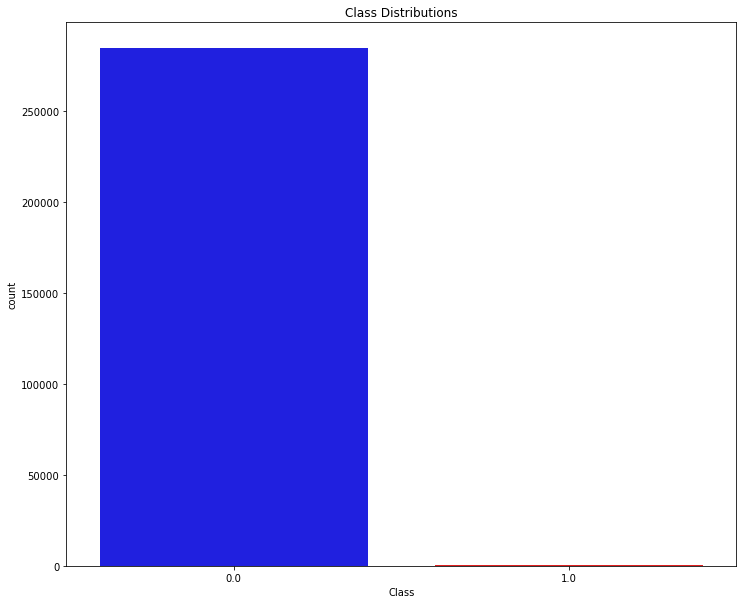

In [5]:
label_dist(df)

colors = ['Blue', 'Red']
sns.countplot(x='Class', data=df, palette=colors)
plt.title('Class Distributions')

Split data into 70/10/20 train/valid/test sets

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class', axis=1), df['Class'],
                                                    train_size=0.8, stratify=df['Class'], random_state=10)
train_df = pd.concat([X_train,y_train], axis=1)
X_train, X_valid, y_train, y_valid = train_test_split(train_df.drop('Class', axis=1), train_df['Class'],
                                                      train_size = 0.875, stratify=train_df['Class'], random_state=10)

Check to see if proportion of fraud/non-fraud stays the same

In [7]:
train_df = pd.concat([X_train,y_train],axis=1)
valid_df = pd.concat([X_valid,y_valid],axis=1)
test_df = pd.concat([X_test,y_test],axis=1)

label_dist(train_df)
label_dist(valid_df)
label_dist(test_df)

print(train_df.shape)
print(valid_df.shape)
print(test_df.shape)

Non-fraud count:199019, percentage:0.9983
Fraud count:345, percentage:0.0017
Non-fraud count:28432, percentage:0.9983
Fraud count:49, percentage:0.0017
Non-fraud count:56864, percentage:0.9983
Fraud count:98, percentage:0.0017
(199364, 31)
(28481, 31)
(56962, 31)


Standartize amount and time

In [8]:
scaler_time = StandardScaler()
scaler_amount = StandardScaler()

train_df['amount_scaled'] = scaler_amount.fit_transform(train_df['Amount'].values.reshape(-1, 1))
train_df['time_scaled'] = scaler_time.fit_transform(train_df['Time'].values.reshape(-1, 1))

train_df.drop(['Time', 'Amount'], axis=1, inplace=True)
train_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,amount_scaled,time_scaled
237031,-0.085520,0.936449,0.263345,-0.611553,0.461018,-1.037166,0.998900,-0.232357,-0.017857,-0.315464,...,-0.525347,0.087036,-0.013722,-0.504994,0.129953,0.116112,0.095062,0.0,-0.349376,1.139014
185360,-0.403965,0.521331,0.313677,-0.852565,1.637290,-0.668025,1.175408,-0.419416,-0.183173,-0.306743,...,-0.546232,-0.067334,-0.964955,-0.417499,0.163347,0.179407,0.016262,0.0,-0.287223,0.666718
74185,-11.746655,-10.410737,-1.273259,5.588220,-2.582046,5.319379,6.079441,-4.303163,4.475719,4.983061,...,1.044273,-4.415716,-0.929446,0.180019,0.436373,-3.420042,6.649828,0.0,5.960438,-0.831796
94834,-1.324851,0.067462,1.151013,-0.133964,1.853985,-0.117770,0.467245,0.175808,-0.491385,-0.747007,...,-0.063122,-0.310304,-1.345351,0.842410,-0.291014,0.000405,0.062790,0.0,-0.196590,-0.629820
222987,1.386642,-2.962577,-0.242305,-1.202140,-2.508778,-0.271503,-1.302101,-0.167785,-0.856364,1.327056,...,0.592247,-0.131501,-0.075574,-0.679014,-0.160502,-0.004163,0.052858,0.0,1.476299,1.015676


In [9]:
def transform_columns_df(df, columns, new_names, scalers):
    for i, col in enumerate(columns):
        df[new_names[i]] = scalers[i].transform(df[col].values.reshape(-1,1))
        
    df.drop(columns, axis=1, inplace=True)


transform_columns_df(valid_df, ['Amount', 'Time'], ['amount_scaled', 'time_scaled'], [scaler_amount, scaler_time])
transform_columns_df(test_df, ['Amount', 'Time'], ['amount_scaled', 'time_scaled'], [scaler_amount, scaler_time])

In [10]:
valid_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,amount_scaled,time_scaled
274787,1.913833,-1.853837,-2.589597,-1.621136,-0.289451,-0.620988,0.055887,-0.507180,-2.151759,1.702801,...,0.306186,-0.376252,-0.970435,0.427645,0.124877,-0.093036,-0.051906,0.0,0.708777,1.499973
73726,-1.646843,-1.790960,2.261647,-2.096084,-1.423398,-0.434670,-0.263121,0.171311,-2.091122,0.603732,...,0.115125,0.634499,0.321314,0.271231,-0.284489,0.220703,0.170328,0.0,0.736139,-0.836134
194407,2.215824,-1.472475,-0.845387,-1.391175,-1.046684,0.126605,-1.161914,0.010697,-1.104805,1.478069,...,-0.602217,0.333342,0.703000,-0.169909,-0.375415,0.023107,-0.054102,0.0,-0.281032,0.749547
143352,-0.396539,0.982618,1.184098,-0.279468,0.517985,0.062379,0.628962,0.119467,-0.356346,-0.360315,...,-0.627359,-0.092415,-0.783679,-0.151305,0.152552,0.280604,0.109318,0.0,-0.331441,-0.203676
269757,-4.215394,3.000950,-0.751251,-2.938234,-1.900828,-0.569094,-1.085554,1.302509,1.490250,3.423210,...,-1.547460,0.382878,0.631315,0.018687,0.855132,0.712823,0.508715,0.0,-0.336953,1.448389


In [11]:
test_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,amount_scaled,time_scaled
255082,1.854152,-0.519589,-0.514974,0.222135,0.167165,1.410326,-0.857680,0.444449,1.336743,-0.338286,...,1.173193,0.226551,-0.301697,-0.272161,-0.148270,0.095050,-0.039823,0.0,-0.313027,1.307282
213380,2.058216,-0.341962,-0.634181,0.274131,-0.222164,-0.003679,-0.555059,-0.056974,1.382131,-0.192435,...,0.716194,-0.017505,-0.949786,0.079003,-0.153748,0.048212,-0.045393,0.0,-0.332999,0.932006
164703,2.315952,-1.411860,-1.562298,-1.914605,-0.329000,0.742586,-1.287703,0.166586,-1.196466,1.558718,...,-0.214906,0.418691,3.403795,-0.146143,-0.317162,-0.015370,-0.019716,0.0,-0.273043,0.462342
88333,-0.790366,1.237118,2.300278,3.357846,-0.669674,1.056705,-0.455029,0.914659,-1.610736,0.847301,...,0.969935,0.042168,-0.033935,-0.693568,0.105006,0.053723,0.115065,0.0,-0.139231,-0.692121
107388,-0.276744,-1.043150,2.391043,-1.546070,-2.308425,1.108599,-1.067485,0.416579,-0.845733,0.816198,...,0.119594,-0.106444,0.009886,-0.062344,-0.125828,0.031148,-0.005105,0.0,0.064283,-0.516968


Write sets to files

In [12]:
train_df.to_parquet(DATA_PATH+'train.parquet')
valid_df.to_parquet(DATA_PATH+'valid.parquet')
test_df.to_parquet(DATA_PATH+'test.parquet')